<a href="https://colab.research.google.com/github/JuanSpecht/ML2021/blob/main/TP1/ML_TP1_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importo dependencias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Cargo los datasets

repo_url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/'
beds_url = repo_url + 'camas_covid_bahia.csv'
cases_url = repo_url + 'casos_covid_bahia.csv'

beds_df = pd.read_csv(beds_url)
cases_df = pd.read_csv(cases_url)

#Dataset de casos

In [5]:
cases_df.head()

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0


<Figure size 432x288 with 0 Axes>

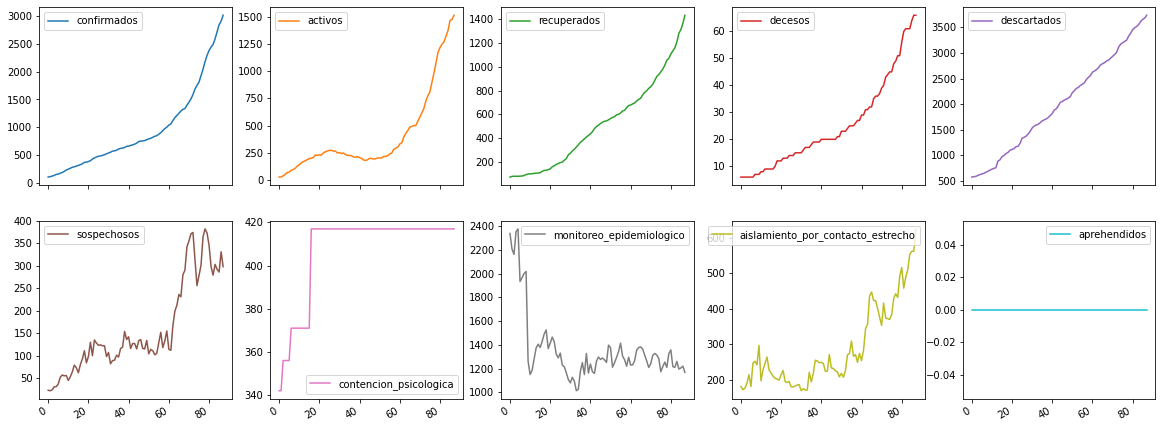

In [6]:
plt.figure()
cases_df.plot(subplots=True, legend=True, figsize=(20,8), layout=(2, 5))
plt.show()

Lo primero que se puede notar es el hecho de que variables como "confirmados", "activos", "recuperados", "decesos" o "descartados" sean exclusivamente ascendentes, esto sugiere que están presentadas de forma acumulativa.

Por otro lado, hay variables que tienen comportamientos particulares:
* "aprehendidos" es nula en todas las fechas
* "contención_psicológica" cambia de valor tres veces al principio del dataset y luego se mantiene constante. Esto puede indicar un defecto en la carga de datos o que en un prinicpio se ofreció dicho servicio y luego se descartó.
* "decesos" tiene mesetas que indican días sin fallecimientos.

A continuación calculo los valores diarios y obtengo sus histogramas para ver si alguna de las variables tiene una distribución normal.

<Figure size 432x288 with 0 Axes>

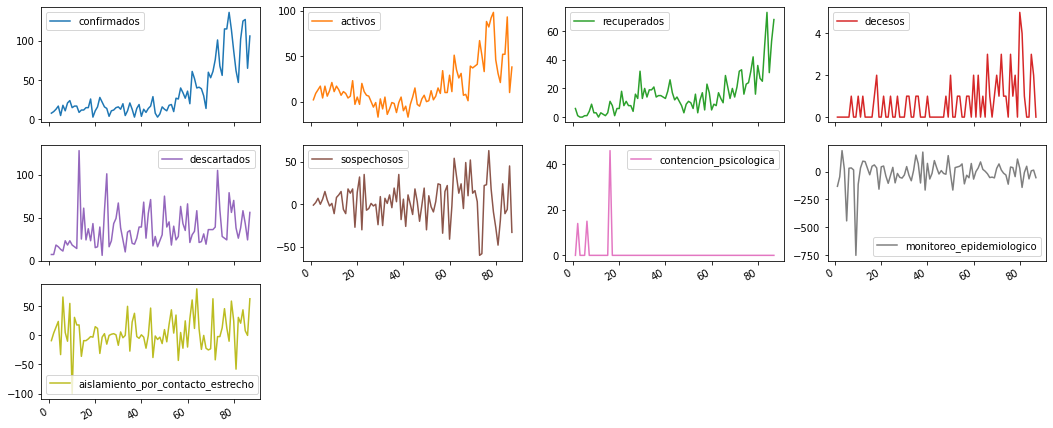

In [7]:
daily_cases_df = cases_df.iloc[:,1:-1].diff(axis=0) # no considero la fecha en este paso

plt.figure()
daily_cases_df.plot(subplots=True, legend=True, figsize=(18,8), layout=(3, 4))
plt.show()

En esta representación se puede ver que varias de las variables tienen una distribución que parece ser normal, ya que oscilan alrededor de un valor medio, por ejemplo "sospechosos" o "aislamiento_por_contacto_estrecho"

También hay variables que tienen una distribución en apariencia normal en un rango de fechas, como "confirmados", "activos", pero luego se disparan los valores y cambia el comportamiento.

Por otro lado está "monitoreo_epidemiológico", que los primeros días es más errático y luego tiene una distribción que parece normal

Se confirma viendo el gráfico de "decesos" que hay días en que no hubo fallecimientos

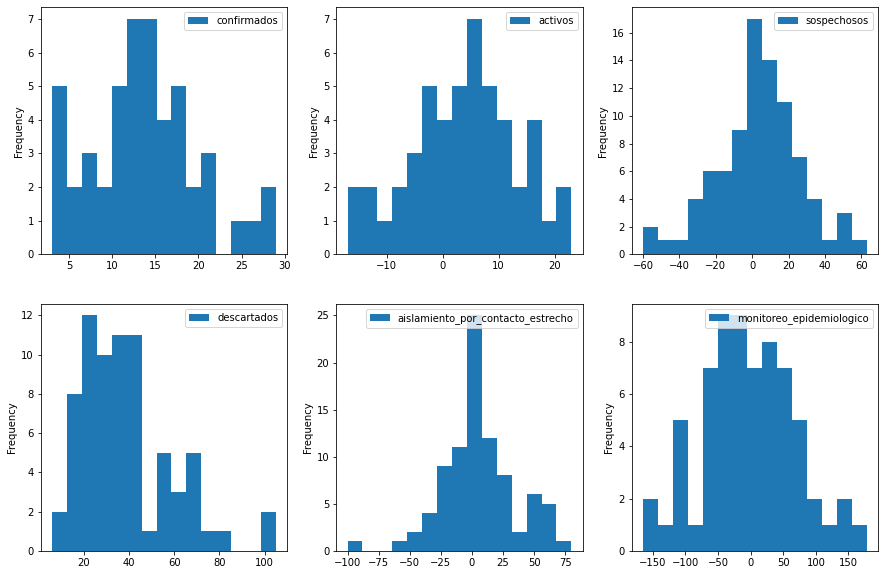

In [25]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

daily_cases_df.iloc[0:50,0].plot.hist(ax = ax[0,0], subplots=True, legend=True, bins = 15)
daily_cases_df.iloc[0:50,1].plot.hist(ax = ax[0,1], subplots=True, legend=True, bins = 15)
daily_cases_df.iloc[:,5].plot.hist(ax = ax[0,2], subplots=True, legend=True, bins = 15)
daily_cases_df.iloc[15:-1,4].plot.hist(ax = ax[1,0], subplots=True, legend=True, bins = 15)
daily_cases_df.iloc[:,8].plot.hist(ax = ax[1,1], subplots=True, legend=True, bins = 15)
daily_cases_df.iloc[20:-1,7].plot.hist(ax = ax[1,2], subplots=True, legend=True, bins = 15)

plt.show()

En los histogramas se pueden ver distribuciones en apariencia normales para los rangos antes indicados en las diferentes variables

#Dataset de camas

In [26]:
beds_df.head()

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN


Invierto el dataset para que el índice crezca con el número de informe:

In [34]:
beds_df = beds_df.iloc[::-1]
beds_df = beds_df.set_index(pd.Series(range(beds_df.shape[0])))
beds_df.head()

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,1,2020-06-30,848,347,40,155,15,10,16,32,1,143,23,0,0,137,0,3,NaN
1,7,2020-07-01,848,386,45,155,12,12,15,32,2,143,24,0,0,137,0,3,NaN
2,8,2020-07-02,848,358,42,155,14,14,18,32,4,143,25,0,0,137,0,3,NaN
3,9,2020-07-03,848,349,41,155,18,13,20,32,4,143,25,0,0,137,0,3,NaN
4,10,2020-07-04,848,343,40,155,14,14,18,32,3,143,22,0,0,137,0,3,NaN


<Figure size 432x288 with 0 Axes>

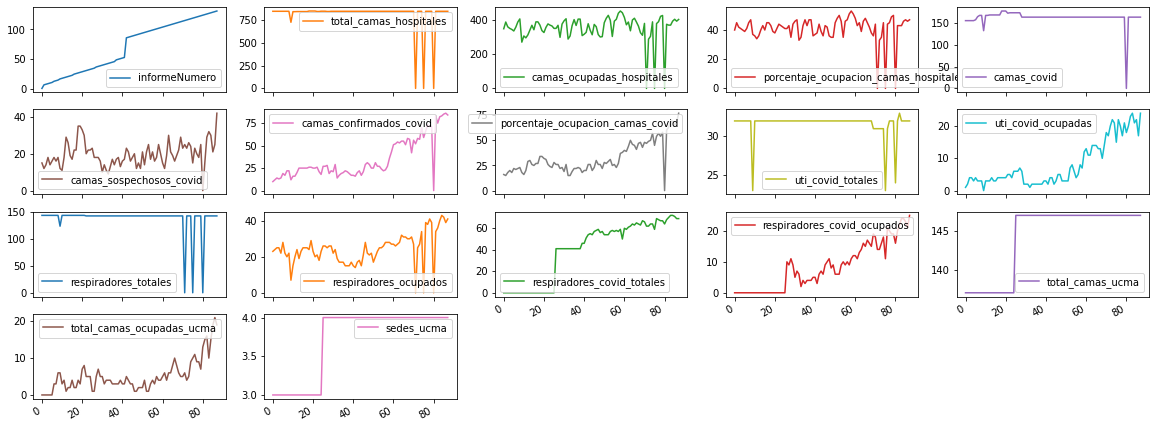

In [35]:
plt.figure()
beds_df.plot(subplots=True, legend=True, figsize=(20,8), layout=(4, 5))
plt.show()

Se pueden hacer diferentes observaciones de los gráficos:

* Hay un quiebre en el número de informe. Mirando esa región del dataset se ve que pasa de 53 a 86 entre el 10 y el 11 de Agosto. Esto puede deberse a una carga de datos atrasados

* Hay fechas puntuales en las cuales diferentes variables se hacen cero por un día. Esto puede deberse a problemas en la carga de informes

* Hay un cambio abrupto en "sedes_ucma" y "total_camas_ucma". Mirando el dataset se ve que el día 25 de Julio se incorporó una sede ucma, o "Unidad de Cuidados Mínimos Ambulatorios" (el valor pasa de 3 a 4) con 10 camas (las camas ucma de 137 a 147).

* Las variables "camas_ocupadas_hospitales" y "porcentaje_ocupación_camas" tienen un comportamiento muy similar entre ellas, lo cual es esperable. Por otro lado parecen ser normales (a excepción de los puntos donde se hacen cero por un día)

* El día 26 de Julio, el valor de "respiradores_covid_totales" pasa de 0 a 41, se mantiene constante unos días y el 8 de Agosto vuelve a crecer pero de manera fluctuante. Esto puede querer decir que el 26 de Julio se asignaron 41 respiradores exclusivamente a casos de covid, y a partir del 8 de Agosto se comenzaron a asignar "a demanda"

* El mismo 26 de Julio en el que se incorporan respiradores para pacientes covid se ve que el valor de "respiradores_covid_ocupados" también deja de ser 0.

A continuación grafico las camas ocupadas y el porcentaje de ocupación de camas para verificar que presentan distribuciones normales.


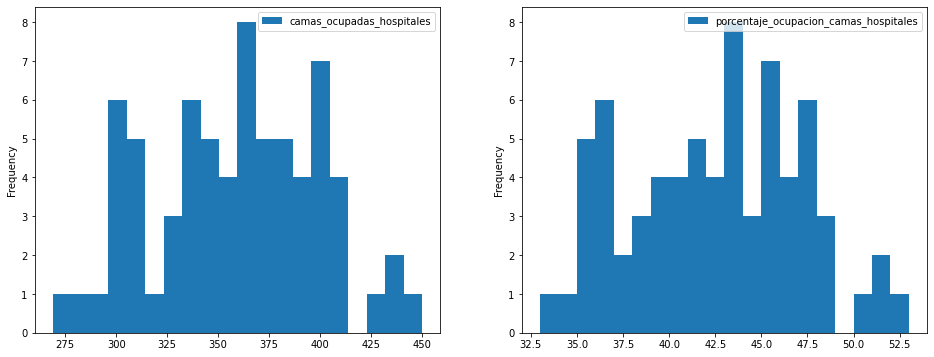

In [49]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

beds_df.iloc[0:70,3].plot.hist(ax = ax[0], subplots=True, legend=True, bins = 20)
beds_df.iloc[0:70,4].plot.hist(ax = ax[1], subplots=True, legend=True, bins = 20)

plt.show()